<a href="https://colab.research.google.com/github/HafsaHameed457/Heart_Failure_Preditcion/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("content/heart.csv")
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,40,49,37,48,54,39,45,54,37,48
Sex,M,F,M,F,M,M,F,M,M,F
ChestPainType,ATA,NAP,ATA,ASY,NAP,NAP,ATA,ATA,ASY,ATA
RestingBP,140,160,130,138,150,120,130,110,140,120
Cholesterol,289,180,283,214,195,339,237,208,207,284
FastingBS,0,0,0,0,0,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal,Normal,Normal,Normal,Normal,Normal
MaxHR,172,156,98,108,122,170,170,142,130,120
ExerciseAngina,N,N,N,Y,N,N,N,N,Y,N
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0


In [ ]:
labels=list(data.columns)
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# New Section

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#Checking for null values:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Seperating object and data coloumns
objcol = []
numcol = []
for i in data.columns:
    if (data[i].dtype == 'object'):
        objcol.append(i)
    else:
        numcol.append(i)

In [ ]:
objcol

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
numcol

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [ ]:
lable = preprocessing.LabelEncoder()
for i in objcol:
    data[i] = lable.fit_transform(data[i])
    print(i,lable.classes_)

Sex ['F' 'M']
ChestPainType ['ASY' 'ATA' 'NAP' 'TA']
RestingECG ['LVH' 'Normal' 'ST']
ExerciseAngina ['N' 'Y']
ST_Slope ['Down' 'Flat' 'Up']


In [ ]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Age,40.0,49.0,37.0,48.0,54.0,39.0,45.0,54.0,37.0,48.0
Sex,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
ChestPainType,1.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0
RestingBP,140.0,160.0,130.0,138.0,150.0,120.0,130.0,110.0,140.0,120.0
Cholesterol,289.0,180.0,283.0,214.0,195.0,339.0,237.0,208.0,207.0,284.0
FastingBS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RestingECG,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
MaxHR,172.0,156.0,98.0,108.0,122.0,170.0,170.0,142.0,130.0,120.0
ExerciseAngina,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0


In [ ]:
heart=data['HeartDisease']
targetdata = data.drop('HeartDisease',axis = 'columns')
targetdata.head().T

,0,1,2,3,4
Age,40.0,49.0,37.0,48.0,54.0
Sex,1.0,0.0,1.0,0.0,1.0
ChestPainType,1.0,2.0,1.0,0.0,2.0
RestingBP,140.0,160.0,130.0,138.0,150.0
Cholesterol,289.0,180.0,283.0,214.0,195.0
FastingBS,0.0,0.0,0.0,0.0,0.0
RestingECG,1.0,1.0,2.0,1.0,1.0
MaxHR,172.0,156.0,98.0,108.0,122.0
ExerciseAngina,0.0,0.0,0.0,1.0,0.0
Oldpeak,0.0,1.0,0.0,1.5,0.0


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(targetdata)
data_scaled = pd.DataFrame(data_scaled, columns=targetdata.columns)

Text(0.5, 1.0, 'Correlation Heatmap')

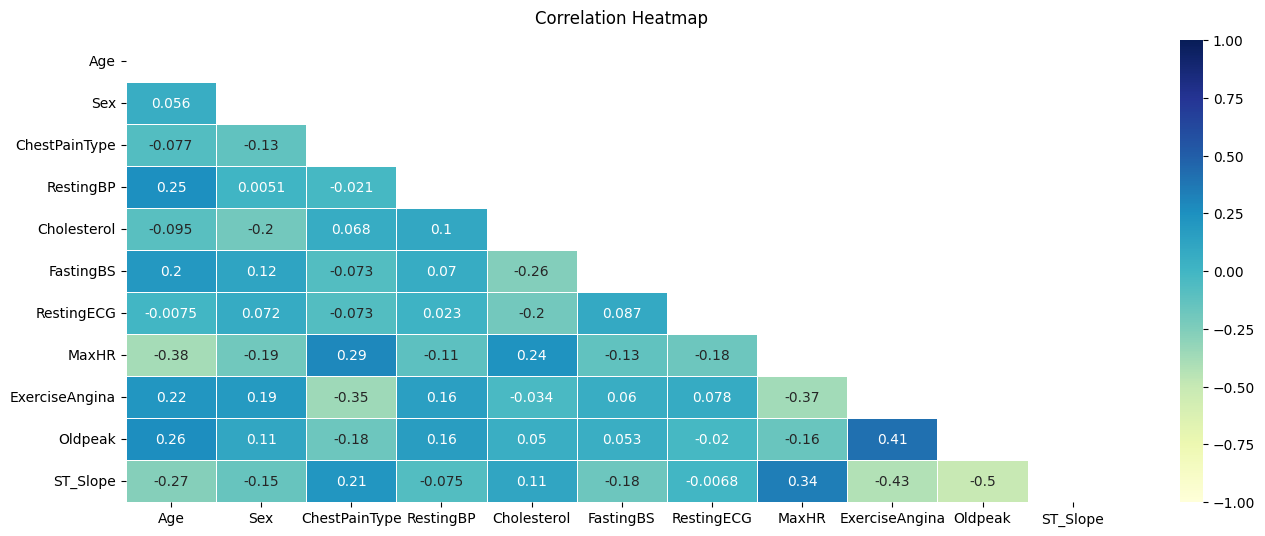

In [ ]:
# Correlation
corr = data_scaled.corr()
plt.figure(figsize=(16,6))
mask =np.triu(np.ones_like(corr, dtype=bool))
heatmap=sns.heatmap(corr,mask=mask,cmap='YlGnBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
data_scaled.drop(to_drop, axis=1, inplace=True)

In [ ]:
data_scaled.head(9).T


,0,1,2,3,4,5,6,7,8
Age,-1.433140,-0.478484,-1.751359,-0.584556,0.051881,-1.539213,-0.902775,0.051881,-1.751359
Sex,0.515952,-1.938163,0.515952,-1.938163,0.515952,0.515952,-1.938163,0.515952,0.515952
ChestPainType,0.229032,1.275059,0.229032,-0.816995,1.275059,1.275059,0.229032,0.229032,-0.816995
RestingBP,0.410909,1.491752,-0.129513,0.302825,0.951331,-0.669935,-0.129513,-1.210356,0.410909
Cholesterol,0.825070,-0.171961,0.770188,0.139040,-0.034755,1.282424,0.349422,0.084157,0.075010
FastingBS,-0.551341,-0.551341,-0.551341,-0.551341,-0.551341,-0.551341,-0.551341,-0.551341,-0.551341
RestingECG,0.017255,0.017255,1.601219,0.017255,0.017255,0.017255,0.017255,0.017255,0.017255
MaxHR,1.382928,0.754157,-1.525138,-1.132156,-0.581981,1.304332,1.304332,0.203982,-0.267596
ExerciseAngina,-0.823556,-0.823556,-0.823556,1.214246,-0.823556,-0.823556,-0.823556,-0.823556,1.214246
Oldpeak,-0.832432,0.105664,-0.832432,0.574711,-0.832432,-0.832432,-0.832432,-0.832432,0.574711


In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [ ]:
x = targetdata
y = heart

In [ ]:
model_rf = RandomForestClassifier(max_depth = 5)
rfe = RFE(model_rf)

rfe.fit(x,y)


RFE(estimator=RandomForestClassifier(max_depth=5))

In [ ]:
x_selected = x.iloc[:,rfe.support_]
x_selected.head()

,ChestPainType,Cholesterol,ExerciseAngina,Oldpeak,ST_Slope
0,1,289,0,0.0,2
1,2,180,0,1.0,1
2,1,283,0,0.0,2
3,0,214,1,1.5,1
4,2,195,0,0.0,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_selected,y, test_size=0.2, random_state = 42)

In [ ]:
model = RandomForestClassifier(max_depth = 5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1= f1_score(y_test,y_pred)

print('Accuracy is :', accuracy)
print('Precision is :', precision)
print('Recall is :', recall)
print('F1 Score is :', f1)

Accuracy is : 0.8641304347826086
Precision is : 0.91
Recall is : 0.8504672897196262
F1 Score is : 0.8792270531400966


In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
lr_accuracy=accuracy_score(y_test,y_pred_lr)
lr_precision = precision_score(y_test,y_pred_lr)
lr_recall = recall_score(y_test,y_pred_lr)
lr_f1= f1_score(y_test,y_pred_lr)

print('Accuracy is :', lr_accuracy)
print('Precision is :', lr_precision)
print('Recall is :', lr_recall)
print('F1 Score is :', lr_f1)

Accuracy is : 0.8043478260869565
Precision is : 0.8817204301075269
Recall is : 0.7663551401869159
F1 Score is : 0.82


In [ ]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_accuracy=accuracy_score(y_test,y_pred_knn)
knn_precision = precision_score(y_test,y_pred_knn)
knn_recall = recall_score(y_test,y_pred_knn)
knn_f1= f1_score(y_test,y_pred_knn)

print('Accuracy is :', knn_accuracy)
print('Precision is :', knn_precision)
print('Recall is :', knn_recall)
print('F1 Score is :', knn_f1)

Accuracy is : 0.7391304347826086
Precision is : 0.8105263157894737
Recall is : 0.719626168224299
F1 Score is : 0.7623762376237623


In [ ]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)
dtree_accuracy=accuracy_score(y_test,y_pred_dtree)
dtree_precision = precision_score(y_test,y_pred_dtree)
dtree_recall = recall_score(y_test,y_pred_dtree)
dtree_f1= f1_score(y_test,y_pred_dtree)

print('Accuracy is :', dtree_accuracy)
print('Precision is :', dtree_precision)
print('Recall is :', dtree_recall)
print('F1 Score is :', dtree_f1)

Accuracy is : 0.7554347826086957
Precision is : 0.8604651162790697
Recall is : 0.6915887850467289
F1 Score is : 0.7668393782383418


In [ ]:
#SVM Classifier
from sklearn import svm
svm_c=svm.SVC(kernel='linear')

In [ ]:
svm_c.fit(x_train, y_train)
y_pred_svm_c = svm_c.predict(x_test)
svm_c_accuracy=accuracy_score(y_test,y_pred_svm_c)
svm_c_precision = precision_score(y_test,y_pred_svm_c)
svm_c_recall = recall_score(y_test,y_pred_svm_c)
svm_c_f1= f1_score(y_test,y_pred_svm_c)

print('Accuracy is :', svm_c_accuracy)
print('Precision is :', svm_c_precision)
print('Recall is :', svm_c_recall)
print('F1 Score is :', svm_c_f1)

Accuracy is : 0.8097826086956522
Precision is : 0.875
Recall is : 0.7850467289719626
F1 Score is : 0.8275862068965517


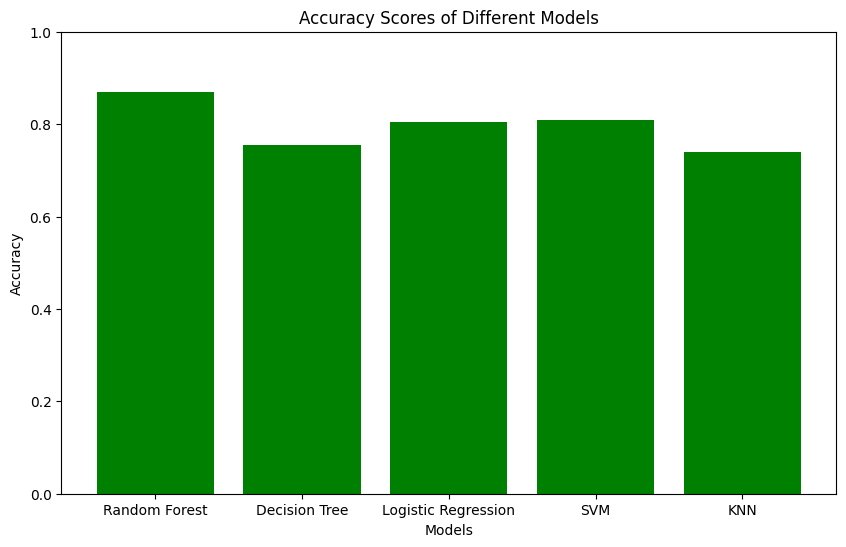

In [ ]:
## Accuracy Graph Plot
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN']
acc_scores = [accuracy, dtree_accuracy, lr_accuracy, svm_c_accuracy, knn_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, acc_scores, color='green')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

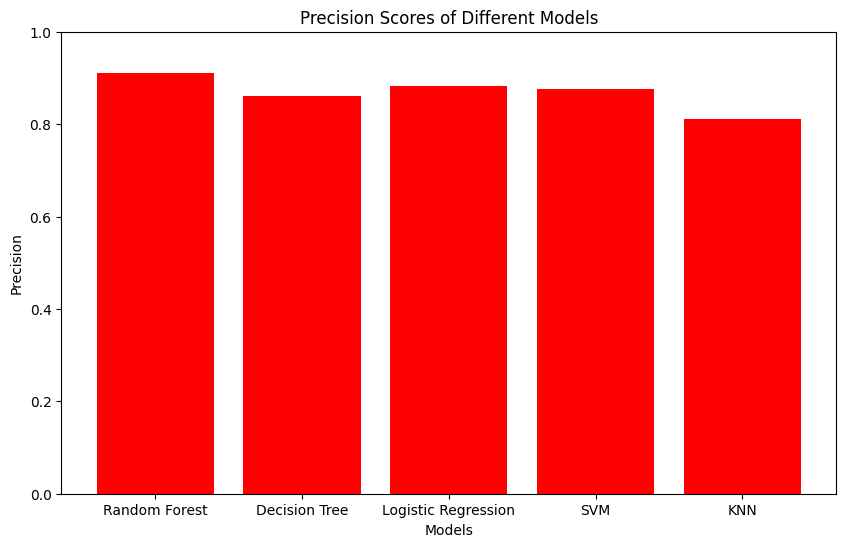

In [ ]:
## Precision Graph Plot
pre_scores = [precision, dtree_precision, lr_precision, svm_c_precision, knn_precision]
plt.figure(figsize=(10, 6))
plt.bar(models, pre_scores, color='red')
plt.title('Precision Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.show()

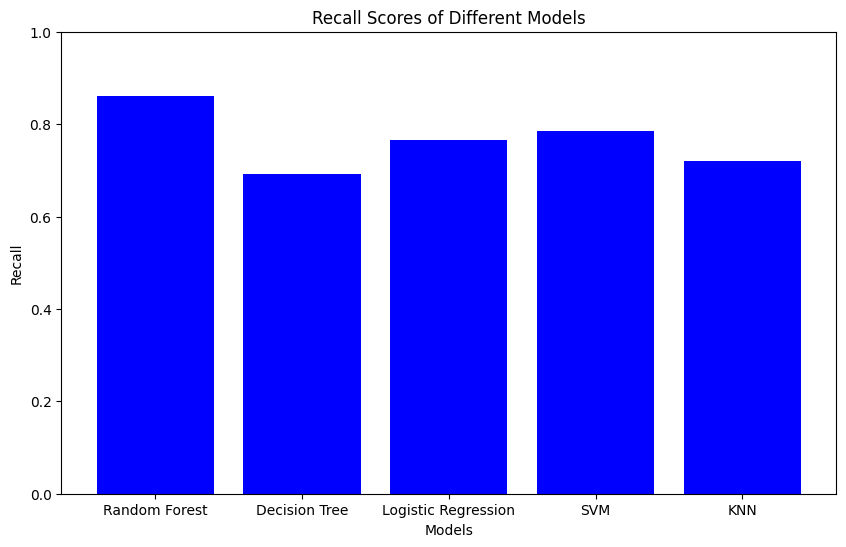

In [ ]:
## Recall Graph Plot
rec_scores = [recall, dtree_recall, lr_recall, svm_c_recall, knn_recall]
plt.figure(figsize=(10, 6))
plt.bar(models, rec_scores, color='blue')
plt.title('Recall Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.ylim([0, 1])
plt.show()

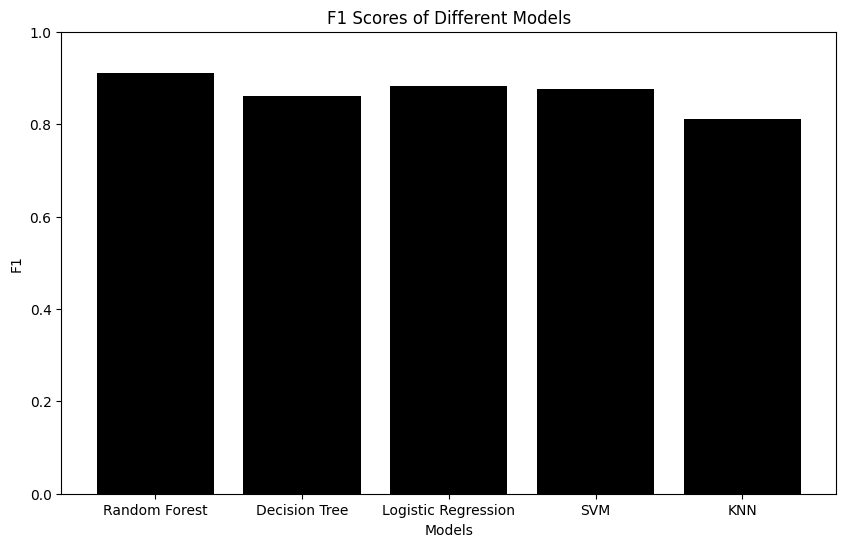

In [ ]:
## F1 Graph Plot
f1_scores = [f1, dtree_f1, lr_f1, svm_c_f1, knn_f1]
plt.figure(figsize=(10, 6))
plt.bar(models, pre_scores, color='black')
plt.title('F1 Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('F1')
plt.ylim([0, 1])
plt.show()

In [ ]:
# Evaluation

In [ ]:
### As we can clearly analyze from the above graphs that all the values(Accuracy
### , Precision, Recall, F1) of Random Forest model is higher than all other
### models so Random Forest is the best model among all of them.